<a href="https://colab.research.google.com/github/LeTienNhan20104048/LeTienNhan20104048/blob/main/Tuan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=79c4554c16aed2fca4bb480427498873f9d11d2408600efbc052c940e593afaa
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


5.399999999999998


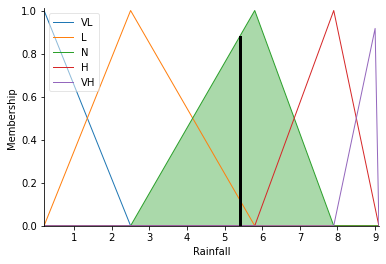

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
WS=ctrl.Antecedent(np.arange(0.7,3.2,0.1),'Wind speed')
TP=ctrl.Antecedent(np.arange(20.4,41.3,0.1),'Temperature C')
RF=ctrl.Consequent(np.arange(0.2,9.2,0.1),'Rainfall')
WS['VL']=fuzz.trimf(WS.universe,[0.7,0.7,1.2])
WS['L']=fuzz.trimf(WS.universe,[0.7,1.2,1.6])
WS['N']=fuzz.trimf(WS.universe,[1.2,1.6,2.4])
WS['H']=fuzz.trimf(WS.universe,[1.6,2.4,3.1])
WS['VH']=fuzz.trimf(WS.universe,[2.4,3.1,3.1])
RF['VL']=fuzz.trimf(RF.universe,[0.2,0.2,2.5])
RF['L']=fuzz.trimf(RF.universe,[0.2,2.5,5.8])
RF['N']=fuzz.trimf(RF.universe,[2.5,5.8,7.9])
RF['H']=fuzz.trimf(RF.universe,[5.8,7.9,9.1])
RF['VH']=fuzz.trimf(RF.universe,[7.9,9.1,9.1])
TP['VL']=fuzz.trimf(TP.universe,[20.4,20.4,23.6])
TP['L']=fuzz.trimf(TP.universe,[20.4,23.6,28.7])
TP['N']=fuzz.trimf(TP.universe,[23.6,28.7,35.6])
TP['H']=fuzz.trimf(TP.universe,[28.7,35.6,41.2])
TP['VH']=fuzz.trimf(TP.universe,[35.6,41.2,41.2])
rule1 = ctrl.Rule( WS['VL'] & TP['VL'], RF['VL'])
rule2 = ctrl.Rule( WS['VL'] & TP['L'], RF['VL'])
rule3 = ctrl.Rule( WS['VL'] & TP['N'], RF['L'])
rule4 = ctrl.Rule( WS['VL'] & TP['H'], RF['L'])
rule5 = ctrl.Rule( WS['VL'] & TP['VH'], RF['N'])
rule6 = ctrl.Rule( WS['L'] & TP['VL'], RF['VL'])
rule7 = ctrl.Rule( WS['L'] & TP['L'], RF['L'])
rule8 = ctrl.Rule( WS['L'] & TP['N'], RF['L'])
rule9 = ctrl.Rule( WS['L'] & TP['H'], RF['N'])
rule10 = ctrl.Rule( WS['L'] & TP['VH'], RF['H'])
rule11 = ctrl.Rule( WS['N'] & TP['VL'], RF['L'])
rule12 = ctrl.Rule( WS['N'] & TP['L'], RF['L'])
rule13 = ctrl.Rule( WS['N'] & TP['N'], RF['N'])
rule14 = ctrl.Rule( WS['N'] & TP['H'], RF['H'])
rule15 = ctrl.Rule( WS['N'] & TP['VH'], RF['H'])
rule16 = ctrl.Rule( WS['H'] & TP['VL'], RF['L'])
rule17 = ctrl.Rule( WS['H'] & TP['L'], RF['N'])
rule18 = ctrl.Rule( WS['H'] & TP['N'], RF['H'])
rule19 = ctrl.Rule( WS['H'] & TP['H'], RF['H'])
rule20 = ctrl.Rule( WS['H'] & TP['VH'], RF['VH'])
rule21 = ctrl.Rule( WS['VH'] & TP['VL'], RF['N'])
rule22 = ctrl.Rule( WS['VH'] & TP['L'], RF['H'])
rule23 = ctrl.Rule( WS['VH'] & TP['N'], RF['H'])
rule24 = ctrl.Rule( WS['VH'] & TP['H'], RF['VH'])
rule25 = ctrl.Rule( WS['VH'] & TP['VH'], RF['VH'])
rain_ctrl = ctrl.ControlSystem ([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rain = ctrl.ControlSystemSimulation(rain_ctrl)
rain.input['Wind speed'] = 26
rain.input['Temperature C'] = 5
rain.compute()
print( rain.output['Rainfall'])
RF.view(sim = rain)